<a href="https://colab.research.google.com/github/miraculusik/tensorflow-deep-learning-practices/blob/main/tensorflow_nlp_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: 1 
Rebuild, compile and train model_1, model_2 and model_5 using the Keras Sequential API instead of the Functional API.


In [1]:
# Download data
import zipfile

!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

zip_ref = zipfile.ZipFile("nlp_getting_started.zip")
zip_ref.extractall()
zip_ref.close()

--2021-09-11 16:25:20--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2021-09-11 16:25:20 (91.1 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [2]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [4]:
#visualize some texts
import random

random_index = random.randint(0, len(train_df)-5) 

for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target>0 else "(not a real disaster)" )
  print(f"Text: \n{text}\n")
  print("---\n")

Target: 0 (not a real disaster)
Text: 
I... I might buy my esoteric weapon for astrologian...

---

Target: 0 (not a real disaster)
Text: 
Sinkhole Selfies: You Wont Believe What's In The Brooklyn Sinkhole!: 
        Sinkhole Selfies: You Wont Belie... http://t.co/A3b5n3rcr5

---

Target: 0 (not a real disaster)
Text: 
@POTUS you until you drown by water entering the lungs. You being alive has caused this great country to fall to shit because you're a pussy

---

Target: 1 (real disaster)
Text: 
Israel continues its demolition of Palestinian homes #gop #potus #irandeal #isis  https://t.co/NMgp7iMEIi

---

Target: 1 (real disaster)
Text: 
I liked a @YouTube video http://t.co/XO2ZbPBJB3 FEMA REGION III TARGETED for BIOTERRORISM !!! NASA - JAPAN ROCKET LAUNCH with LITHIUM

---



In [5]:
# split data train and val set
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                              train_df_shuffled["target"].to_numpy(),
                                                                              test_size=0.1,
                                                                              random_state=42)

In [6]:
len(train_sentences), len(train_labels)

(6851, 6851)

In [7]:
len(val_sentences), len(val_labels)

(762, 762)

In [8]:
#tokenization layer
import tensorflow as tf
from tensorflow.keras import layers

MAX_TOKENS = 10000
MAX_LENGTH = round(sum([len(i.split()) for i in train_sentences])/ len(train_sentences))
print("Max length:",MAX_LENGTH)

text_vectorizer = layers.TextVectorization(max_tokens=MAX_TOKENS,
                                           output_mode="int",
                                           output_sequence_length= MAX_LENGTH,
                                           name="text_vectorization_layer")

Max length: 15


In [9]:
text_vectorizer.adapt(train_sentences)

In [10]:
#embedding layer

embedding = layers.Embedding(
    input_dim = MAX_TOKENS,
    output_dim=128,
    input_length = MAX_LENGTH,
    name="embedding_layer"
)

In [11]:
# model_1

model_1 = tf.keras.Sequential([
  layers.Input(shape=(1,), dtype="string"),
  text_vectorizer,
  embedding,
  layers.GlobalAveragePooling1D(),
  layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_1")

In [12]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_layer (Te (None, 15)                0         
_________________________________________________________________
embedding_layer (Embedding)  (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [14]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 5s 18ms/step - loss: 0.6130 - accuracy: 0.6860 - val_loss: 0.5364 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4421 - accuracy: 0.8184 - val_loss: 0.4700 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3470 - accuracy: 0.8593 - val_loss: 0.4559 - val_accuracy: 0.7953
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.2848 - accuracy: 0.8898 - val_loss: 0.4661 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2380 - accuracy: 0.9130 - val_loss: 0.4803 - val_accuracy: 0.7874


In [15]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {
      "accuracy": model_accuracy,
      "precision": model_precision,
      "recall": model_recall,
      "f1_score": model_f1_score
      }
  return model_results

In [16]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))

model_1_results = calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 0.7874015748031497,
 'f1_score': 0.7842639469124086,
 'precision': 0.7927656871284042,
 'recall': 0.7874015748031497}

In [17]:
# model_2
model_2 = tf.keras.Sequential([
  layers.Input(shape=(1,), dtype="string"),
  text_vectorizer,
  embedding,
  layers.LSTM(64, return_sequences=True),
  layers.LSTM(32),
  layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_2_LSTM")

# compile model_2
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [18]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_layer (Te (None, 15)                0         
_________________________________________________________________
embedding_layer (Embedding)  (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 15, 64)            49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 1,341,857
Trainable params: 1,341,857
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 14s 44ms/step - loss: 0.2275 - accuracy: 0.9207 - val_loss: 0.5825 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 8s 39ms/step - loss: 0.1582 - accuracy: 0.9391 - val_loss: 0.6599 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 8s 38ms/step - loss: 0.1325 - accuracy: 0.9486 - val_loss: 0.6667 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 8s 39ms/step - loss: 0.1042 - accuracy: 0.9591 - val_loss: 0.7883 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 8s 38ms/step - loss: 0.0837 - accuracy: 0.9666 - val_loss: 1.0107 - val_accuracy: 0.7822


In [20]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': 0.7821522309711286,
 'f1_score': 0.779380517102918,
 'precision': 0.7860403042839984,
 'recall': 0.7821522309711286}

In [21]:
# model_5
model_5 = tf.keras.Sequential([
  layers.Input(shape=(1,), dtype="string"),
  text_vectorizer,
  embedding,
  layers.Conv1D(32, kernel_size=3, activation="relu"),
  layers.GlobalAveragePooling1D(),
  layers.Dense(1, activation="sigmoid")
], name="model_5_Conv1D")

#compile model_5
model_5.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [22]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_layer (Te (None, 15)                0         
_________________________________________________________________
embedding_layer (Embedding)  (None, 15, 128)           1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 13, 32)            12320     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,292,353
Trainable params: 1,292,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2356 - accuracy: 0.9368 - val_loss: 0.6267 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1218 - accuracy: 0.9549 - val_loss: 0.7709 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0982 - accuracy: 0.9642 - val_loss: 0.8939 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0853 - accuracy: 0.9669 - val_loss: 0.9727 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0751 - accuracy: 0.9679 - val_loss: 1.0440 - val_accuracy: 0.7638


In [27]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 0.7637795275590551,
 'f1_score': 0.762372083327101,
 'precision': 0.7640630933275061,
 'recall': 0.7637795275590551}

# Exercise: 2
Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?

In [31]:
# get 10% of train_sentences
_, train_sentences_10_percent, _, train_labels_10_percent = train_test_split(train_sentences,
                                                                             train_labels,
                                                                             test_size=0.1,
                                                                             random_state=42)

In [33]:
len(train_sentences_10_percent), len(train_labels_10_percent)

(686, 686)

In [34]:
len(train_sentences), len(train_labels)

(6851, 6851)

In [41]:
#baseline model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

baseline_model = Pipeline([
  ("tfidf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

baseline_model.fit(train_sentences_10_percent, train_labels_10_percent)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [44]:
baseline_model_preds = baseline_model.predict(val_sentences)
baseline_model_preds[:10]

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [51]:
baseline_model_results = calculate_results(val_labels, baseline_model_preds)
baseline_model_results

{'accuracy': 0.7060367454068242,
 'f1_score': 0.6747604694140249,
 'precision': 0.7777273287601192,
 'recall': 0.7060367454068242}

In [54]:
# USE model
import tensorflow_hub as hub

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="use")

In [55]:
#build model
use_model = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="use_model")

# compile model
use_model.compile(loss="binary_crossentropy",
                  optimizer= tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

In [56]:
use_model.summary()

Model: "use_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
use (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [57]:
use_model_history = use_model.fit(train_sentences_10_percent,
                                  train_labels_10_percent,
                                  epochs=5,
                                  validation_data=(val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 4s 47ms/step - loss: 0.6681 - accuracy: 0.6545 - val_loss: 0.6441 - val_accuracy: 0.6877
Epoch 2/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5913 - accuracy: 0.8076 - val_loss: 0.5883 - val_accuracy: 0.7441
Epoch 3/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5149 - accuracy: 0.8192 - val_loss: 0.5364 - val_accuracy: 0.7677
Epoch 4/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4534 - accuracy: 0.8353 - val_loss: 0.5040 - val_accuracy: 0.7795
Epoch 5/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4102 - accuracy: 0.8411 - val_loss: 0.4888 - val_accuracy: 0.7808


In [58]:
use_model_pred_probs = use_model.predict(val_sentences)
use_model_preds = tf.squeeze(tf.round(use_model_pred_probs))

use_model_results = calculate_results(val_labels, use_model_preds)
use_model_results

{'accuracy': 0.7808398950131233,
 'f1_score': 0.778533312750939,
 'precision': 0.7834583238190046,
 'recall': 0.7808398950131233}

In [59]:
baseline_model_results

{'accuracy': 0.7060367454068242,
 'f1_score': 0.6747604694140249,
 'precision': 0.7777273287601192,
 'recall': 0.7060367454068242}

# Exercise: 3
Try fine-tuning the TF Hub Universal Sentence Encoder model by setting training=True when instantiating it as a Keras layer.

In [60]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True,
                                        name="use")

In [61]:
#build model
use_model_trainable = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="use_model")

# compile model
use_model_trainable.compile(loss="binary_crossentropy",
                            optimizer= tf.keras.optimizers.Adam(),
                            metrics=["accuracy"])

In [62]:
use_model_trainable_history = use_model_trainable.fit(train_sentences_10_percent,
                                                      train_labels_10_percent,
                                                      epochs=5,
                                                      validation_data = (val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 67s 3s/step - loss: 0.5974 - accuracy: 0.6808 - val_loss: 0.5300 - val_accuracy: 0.7756
Epoch 2/5
22/22 [==============================] - 61s 3s/step - loss: 0.3766 - accuracy: 0.8571 - val_loss: 0.4745 - val_accuracy: 0.7861
Epoch 3/5
22/22 [==============================] - 58s 3s/step - loss: 0.2104 - accuracy: 0.9286 - val_loss: 0.4962 - val_accuracy: 0.8058
Epoch 4/5
22/22 [==============================] - 56s 3s/step - loss: 0.0839 - accuracy: 0.9810 - val_loss: 0.5614 - val_accuracy: 0.7887
Epoch 5/5
22/22 [==============================] - 55s 2s/step - loss: 0.0307 - accuracy: 0.9956 - val_loss: 0.6244 - val_accuracy: 0.7585


In [64]:
use_model_trainable_pred_probs = use_model_trainable.predict(val_sentences)
use_model_trainable_preds = tf.squeeze(tf.round(use_model_trainable_pred_probs))

use_model_trainable_results = calculate_results(val_labels, use_model_trainable_preds)
use_model_trainable_results

{'accuracy': 0.7585301837270341,
 'f1_score': 0.7589803231968774,
 'precision': 0.7617801030079573,
 'recall': 0.7585301837270341}

# Exercise: 4
Retrain the best model you've got so far on the whole training set (no validation split). Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the sample_submission.csv file from Kaggle (see the Files tab in Colab for what the sample_submission.csv file looks like). Once you've done this, make a submission to the Kaggle competition, how did your model perform?

In [65]:
use_model.summary()

Model: "use_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
use (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [66]:
use_model_q4 = tf.keras.models.clone_model(use_model)
use_model_q4

In [67]:
use_model_q4.summary()

Model: "use_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
use (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [68]:
use_model_q4.compile(loss="binary_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [69]:
use_model_q4_history = use_model_q4.fit(train_df_shuffled["text"].to_numpy(),
                                        train_df_shuffled["target"].to_numpy(),
                                        epochs=5)

Epoch 1/5
238/238 [==============================] - 5s 11ms/step - loss: 0.5004 - accuracy: 0.7868
Epoch 2/5
238/238 [==============================] - 3s 11ms/step - loss: 0.4158 - accuracy: 0.8160
Epoch 3/5
238/238 [==============================] - 3s 11ms/step - loss: 0.4031 - accuracy: 0.8232
Epoch 4/5
238/238 [==============================] - 3s 11ms/step - loss: 0.3938 - accuracy: 0.8256
Epoch 5/5
238/238 [==============================] - 3s 11ms/step - loss: 0.3883 - accuracy: 0.8286


In [73]:
use_model_q4_preds = tf.squeeze(tf.round(use_model_q4.predict(test_df["text"])))
use_model_q4_preds

<tf.Tensor: shape=(3263,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [75]:
pd.Series(use_model_q4_preds).value_counts()

0.0    1991
1.0    1272
dtype: int64

In [77]:
df = pd.read_csv("sample_submission.csv")
df

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [88]:
df["target"] = [int(i) for i in use_model_q4_preds.numpy()]

In [89]:
df

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [90]:
df.to_csv("submission.csv", index=False)


# Exercise: 5
Make a confusion matrix with the best performing model's predictions on the validation set and the validation ground truth labels.

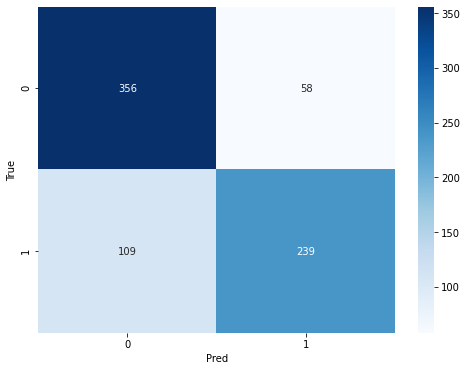

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

use_model_preds = tf.squeeze(tf.round(use_model.predict(val_sentences)))
cm = confusion_matrix(val_labels, use_model_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues")
plt.xlabel("Pred")
plt.ylabel("True");